# Working with the Kitti Dataset

The Kitti dataset is a famous and widely-used dataset in computer vision and robotic vision. It contains many Gigabytes of recorded images from various cameras, GPS, LIDAR, and IMU sensors. This data has been recorded from a car, and contains scenes from cities, residential areas, rural, etc.

We encourage you to read more about it on their [website](https://www.cvlibs.net/datasets/kitti/) and in the [dataset paper](https://www.cvlibs.net/publications/Geiger2013IJRR.pdf).

This notebook shows you how to access the sequences you will be working with for your Pracs and Assignment 2 of ENN583. 

## Download a first sequence

Let's create a new directory, download and unztip one of the smaller sequences 
This will download around 500MB of data.

**Important:** You only have to execute this *once*, and then you can comment it out.

In [2]:
!mkdir ../kitti
!cd ../kitti && curl -O https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0035/2011_09_26_drive_0035_sync.zip
!cd ../kitti && curl -O https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_calib.zip
!cd ../kitti && unzip -o '*.zip'

mkdir: cannot create directory ‘../kitti’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0^C
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4068  100  4068    0     0   3125      0  0:00:01  0:00:01 --:--:--  3126
Archive:  2011_09_26_calib.zip
 extracting: 2011_09_26/calib_cam_to_cam.txt  
 extracting: 2011_09_26/calib_imu_to_velo.txt  
 extracting: 2011_09_26/calib_velo_to_cam.txt  

Archive:  2011_09_26_drive_0035_sync.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive

In [ ]:
!cd ../kitti && curl -O https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0061/2011_09_26_drive_0061_sync.zip
!cd ../kitti && unzip -o '*.zip'

The PyKitti package provides convenient functions to access the dataset without having to write code to parse the file structure ourseles.

Notice how we install it on the fly with pip in case it cannot be imported at first.

In [ ]:
try:
    import pykitti
except:
    !pip install pykitti
    import pykitti

# Read the dataset sequence we just downloaded
basedir = '../kitti'
date = '2011_09_26'
drive = '0035'

# The 'frames' argument is optional - default: None, which loads the whole dataset.
# data = pykitti.raw(basedir, date, drive, frames=range(0, 50, 5))
data = pykitti.raw(basedir, date, drive)


# We now have access to the following information:

# dataset.calib:         Calibration data are accessible as a named tuple
# dataset.timestamps:    Timestamps are parsed into a list of datetime objects
# dataset.oxts:          List of OXTS packets and 6-dof poses as named tuples
# dataset.camN:          Returns a generator that loads individual images from camera N
# dataset.get_camN(idx): Returns the image from camera N at idx  
# dataset.gray:          Returns a generator that loads monochrome stereo pairs (cam0, cam1)
# dataset.get_gray(idx): Returns the monochrome stereo pair at idx  
# dataset.rgb:           Returns a generator that loads RGB stereo pairs (cam2, cam3)
# dataset.get_rgb(idx):  Returns the RGB stereo pair at idx  
# dataset.velo:          Returns a generator that loads velodyne scans as [x,y,z,reflectance]
# dataset.get_velo(idx): Returns the velodyne scan at idx  


Here are some examples of how to use this datastructure.

The images are stored as a <class 'PIL.Image.Image'>
[[-0.94806052 -0.31808596 -0.00160365  0.        ]
 [ 0.31796149 -0.94780875  0.02364432  0.        ]
 [-0.00904088  0.02190635  0.99971915  0.        ]
 [ 0.          0.          0.          1.        ]]
  -0.9481   -0.3181   -0.001604  0         
   0.318    -0.9478    0.02364   0         
  -0.009041  0.02191   0.9997    0         
   0         0         0         1         



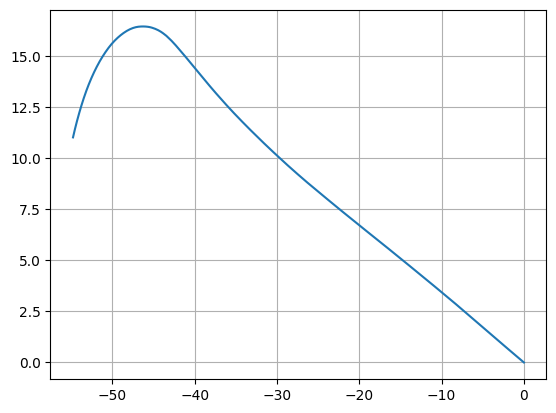

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import spatialmath as sm
%matplotlib inline

# this is how we can access a stereo pair of images
left, right = data.get_rgb(10)

print(f'The images are stored as a {type(left)}')

# data.cam0 and data.cam1 are the left and right grayscale stereo pair
# data.cam2 and data.cam3 are the left and right RGB stereo pair

# we can also iterate through the dataset
# notice how we convert the PIL image into a OpenCV image
for left_rgb in data.cam2:
    img = cv2.cvtColor(np.array(left_rgb), cv2.COLOR_RGB2BGR)    
    # now do something with the image ...

# let's access the ground truth pose for each frame
print(data.oxts[0].T_w_imu) # the pose of the first frame

# these are compatible with the spatialmath SE3 class:
T = sm.SE3(data.oxts[0].T_w_imu)
print(T)

traj = []
for oxts in data.oxts:
    traj.append(sm.SE3(oxts.T_w_imu))

# let's plot the trajectory
plt.plot([T.t[0] for T in traj], [T.t[1] for T in traj])
plt.grid()
